# compare_regressor

this notebook compares the regressor prediction results from **sklearn DecisionTreeRegressor** and our own python implementation **MyDecisionTreeRegressor**.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

### create regression dataset and visualize using pandas

In [2]:
from sklearn.datasets.samples_generator import make_regression

# create dataset with dim (n_samples, n_features), add some noise (std)
X, Y = make_regression(n_samples=100, n_features=6, noise=0.1, random_state=1)
pd.DataFrame(np.hstack((X, Y.reshape(-1,1))), columns=["feature " + str(i+1) for i in range(len(X[0]))] + ["Y"]).head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,Y
0,-0.184176,0.617986,-0.933915,-0.115985,-0.175459,-0.533020,-21.262101
1,-0.661344,1.388779,0.654580,3.030857,0.824585,-0.051188,215.339300
2,-0.067410,-1.113436,1.746435,1.161440,-0.027529,-0.775070,16.364261
3,0.617203,0.120159,-1.142518,0.300170,-0.352250,-0.349343,-32.855250
4,-0.102887,0.840862,0.466643,1.146900,-0.049703,1.033687,132.709265


### train-test split using 0.8-0.2 ratio

In [3]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("training data shape: {}".format(X_train.shape))
print("testing data shape: {}".format(X_test.shape))

training data shape: (80, 6)
testing data shape: (20, 6)


### train our regressor and predict on test data

In [4]:
from MyRegressor import MyDecisionTreeRegressor

# define a tree of depth 10
my_reg = MyDecisionTreeRegressor(max_depth=10, min_samples_split=2)

# train my regressor
my_reg.fit(X_train, Y_train)

# predict on test data 
my_pred = my_reg.predict(X_test)

### train a sklearn regressor and predict as well

In [5]:
from sklearn.tree import DecisionTreeRegressor

# try to keep the available hyperparameters same
sk_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=2)

# train sklearn regressor
sk_reg.fit(X_train, Y_train)

# predict on test data
sk_pred = sk_reg.predict(X_test)

### let's visualize the predictions

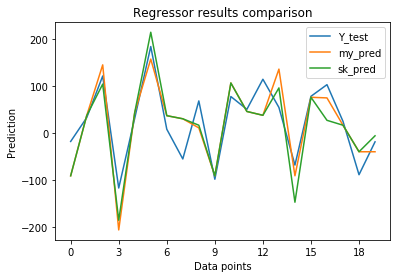

In [6]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(range(len(Y_test)), Y_test, label="Y_test")
plt.plot(range(len(my_pred)), my_pred, label="my_pred")
plt.plot(range(len(sk_pred)), sk_pred, label='sk_pred')

plt.title("Regressor results comparison")
plt.xlabel("Data points")
plt.ylabel("Prediction")
plt.legend()
plt.show()

`our implementation has very comparable results with sklearn :) ` 